We are using kaggle API to fetch our dataset. We are going to download the kaggle.json file to login and use kaggle API. Once downloaded, upload kaggle.json in this block

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahironsharma","key":"df6576674585dec73061e5a2e930bb03"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

We make a directory to store all our files

In [ ]:
!mkdir OCT
%cd OCT

/content/OCT


Searching for the exact name of our dataset

In [ ]:
!kaggle datasets list -s Retinal

ref                                                           title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
andrewmvd/retinal-disease-classification                      Retinal Disease Classification                        7GB  2021-08-16 10:23:33          12603        195  0.875            
paultimothymooney/kermany2018                                 Retinal OCT Images (optical coherence tomography)    11GB  2018-03-25 15:04:56          32401        541  0.75             
gunavenkatdoddi/eye-diseases-classification                   eye_diseases_classification                         736MB  2022-08-28 09:24:24          17162        141  0.875            
sshikamaru/glaucoma-detection                                 Glaucoma

We are going to use the "eye-disease-classification" dataset by gunavenkatdoddi for our model. We download it using the following block of code

In [ ]:
!kaggle datasets download gunavenkatdoddi/eye-diseases-classification
%cd ..

Dataset URL: https://www.kaggle.com/datasets/gunavenkatdoddi/eye-diseases-classification
License(s): ODbL-1.0
100% 736M/736M [00:03<00:00, 169MB/s]
100% 736M/736M [00:03<00:00, 214MB/s]
/content


In [ ]:
!unzip OCT/eye-diseases-classification.zip -d OCT/
!rm OCT/eye-diseases-classification.zip

Archive:  OCT/eye-diseases-classification.zip
  inflating: OCT/dataset/cataract/0_left.jpg  
  inflating: OCT/dataset/cataract/103_left.jpg  
  inflating: OCT/dataset/cataract/1062_right.jpg  
  inflating: OCT/dataset/cataract/1083_left.jpg  
  inflating: OCT/dataset/cataract/1084_right.jpg  
  inflating: OCT/dataset/cataract/1102_left.jpg  
  inflating: OCT/dataset/cataract/1102_right.jpg  
  inflating: OCT/dataset/cataract/1115_left.jpg  
  inflating: OCT/dataset/cataract/1126_right.jpg  
  inflating: OCT/dataset/cataract/112_right.jpg  
  inflating: OCT/dataset/cataract/1144_left.jpg  
  inflating: OCT/dataset/cataract/1144_right.jpg  
  inflating: OCT/dataset/cataract/1164_left.jpg  
  inflating: OCT/dataset/cataract/1167_right.jpg  
  inflating: OCT/dataset/cataract/119_left.jpg  
  inflating: OCT/dataset/cataract/1285_left.jpg  
  inflating: OCT/dataset/cataract/1415_left.jpg  
  inflating: OCT/dataset/cataract/1415_right.jpg  
  inflating: OCT/dataset/cataract/1435_left.jpg  
  

Importing the libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

Renaming our dataset folder for convinience

In [ ]:
#change dataset path if necessary
dataset_path = "OCT/dataset"

valid_extensions = {".jpg", ".jpeg", ".png"}

for disease in os.listdir(dataset_path):
    disease_path = os.path.join(dataset_path, disease)

    if os.path.isdir(disease_path):
        image_files = sorted(os.listdir(disease_path))

        prefix = disease[0].lower()

        for index, filename in enumerate(image_files, start=1):
            file_ext = os.path.splitext(filename)[1].lower()

            if file_ext in valid_extensions:
                new_name = f"{prefix}_{index}{file_ext}"
                old_path = os.path.join(disease_path, filename)
                new_path = os.path.join(disease_path, new_name)

                try:
                    os.rename(old_path, new_path)
                except Exception as e:
                    print(f"Error renaming {filename}: {e}")

        print(f"Renaming complete for folder: {disease}")

print("All image files renamed successfully!")


✅ Renaming complete for folder: cataract
✅ Renaming complete for folder: diabetic_retinopathy
✅ Renaming complete for folder: normal
✅ Renaming complete for folder: glaucoma
🚀 All image files renamed successfully!


Performing a train-test split on our dataset

In [ ]:
import shutil

# Paths
dataset_path = "OCT/dataset"
split_path = "OCT/dataset_split"
train_path = os.path.join(split_path, "train")
test_path = os.path.join(split_path, "test")

# Create directories
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Mapping disease names to labels
label_mapping = {
    "normal": "0",
    "cataract": "1",
    "glaucoma": "2",
    "diabetic_retinopathy": "3"
}

valid_extensions = {".jpg", ".jpeg", ".png"}

for disease, label in label_mapping.items():
    disease_path = os.path.join(dataset_path, disease)

    if os.path.isdir(disease_path):
        train_class_path = os.path.join(train_path, label)
        os.makedirs(train_class_path, exist_ok=True)

        image_files = [f for f in os.listdir(disease_path) if os.path.splitext(f)[1].lower() in valid_extensions]

        if len(image_files) == 0:
            print(f"Warning: No images found in {disease_path}. Skipping...")
            continue

        train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)

        for file in train_files:
            shutil.copy(os.path.join(disease_path, file), os.path.join(train_class_path, file))

        for file in test_files:
            shutil.copy(os.path.join(disease_path, file), os.path.join(test_path, file))

        print(f"Processed {disease}: Train={len(train_files)}, Test={len(test_files)}")

print("Train-test split completed successfully!")


✅ Processed normal: Train=229, Test=58
✅ Processed cataract: Train=752, Test=189
✅ Processed glaucoma: Train=577, Test=145
✅ Processed diabetic_retinopathy: Train=878, Test=220
🚀 Train-test split completed successfully!


Plotting 12 images to check dataset

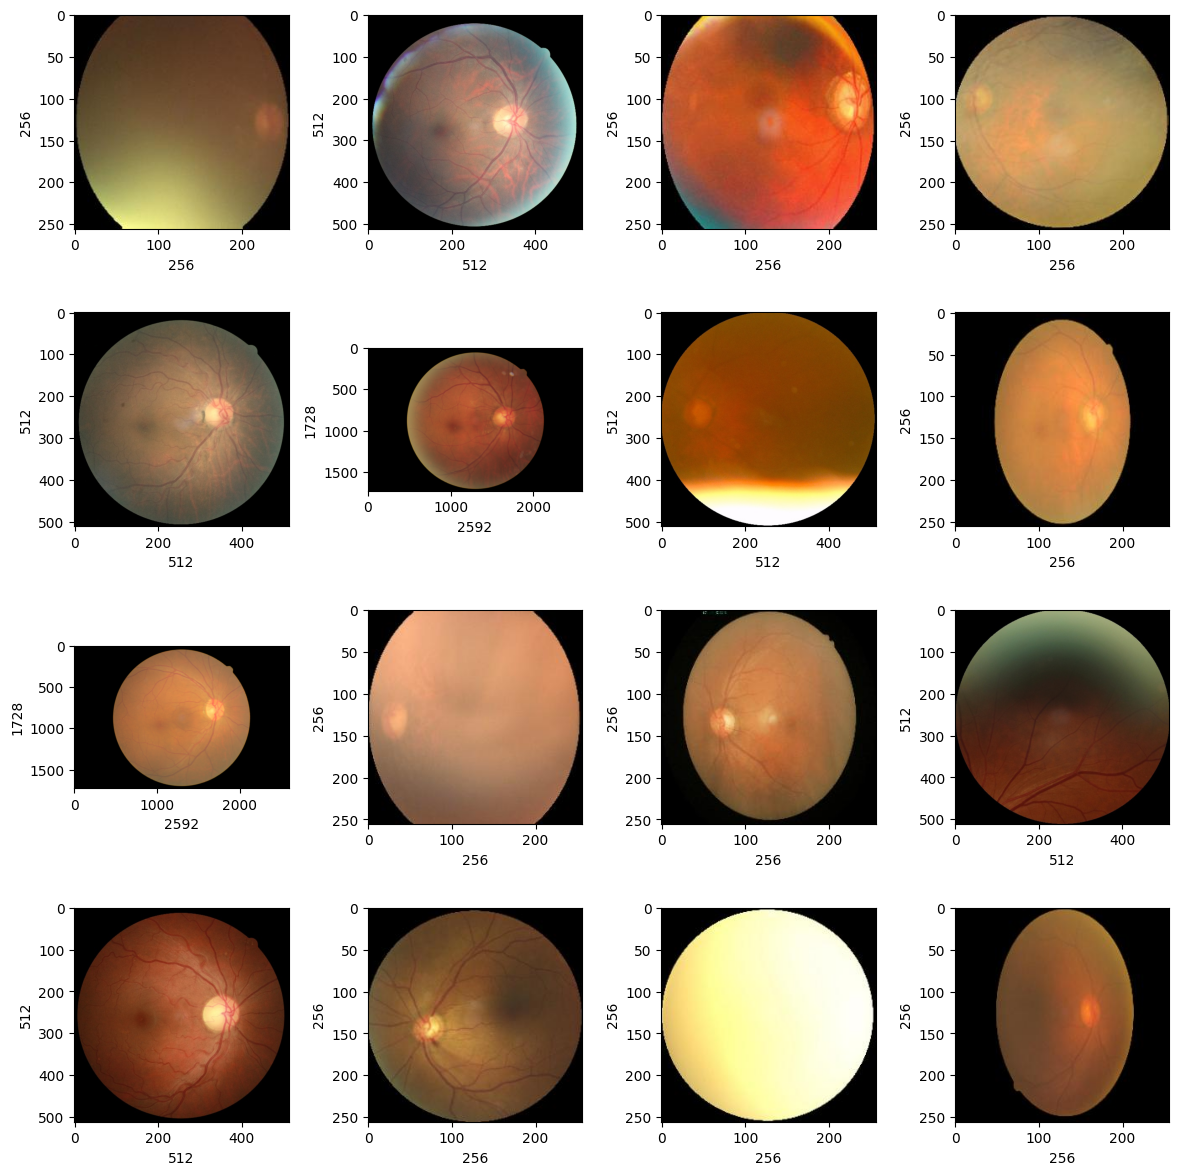

In [ ]:
plt.figure(figsize=(12,12))
path = "OCT/dataset_split/test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

Checking the dimensions of all images to determine mean dimension

In [ ]:
dim1 = []
dim2 = []

for i in range(0,4):
    labels = 'OCT/dataset_split/train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [ ]:
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  467.4675118858954  Dimension 2 Mean :  505.6249339672477


Rescaling all the images

In [ ]:
images = []
label_id = []

for i in range(0,4):
    labels = 'OCT/dataset_split/train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(int(i))

In [ ]:
images = np.array(images)
images = images/255

In [ ]:
label_id = np.array(label_id)
label_id.shape

(3786,)

In [ ]:
images.shape

(3786, 50, 50, 3)

In [ ]:
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

,count
0,
2,1003
1,993
0,912
3,878


In [ ]:
#Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

In [ ]:
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 50, 50, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 23, 23, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         991,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,030,596 (3.93 MB)

 Trainable params: 1,030,596 (3.93 MB)

 Non-trainable params: 0 (0.00 B)

Finalising the model

In [ ]:
model.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/20
24/24 - 11s - 443ms/step - accuracy: 0.3468 - loss: 1.3238 - val_accuracy: 0.5000 - val_loss: 1.2186
Epoch 2/20
24/24 - 2s - 68ms/step - accuracy: 0.4884 - loss: 1.1089 - val_accuracy: 0.5726 - val_loss: 1.0432
Epoch 3/20
24/24 - 1s - 25ms/step - accuracy: 0.5687 - loss: 0.9739 - val_accuracy: 0.6319 - val_loss: 0.9580
Epoch 4/20
24/24 - 1s - 25ms/step - accuracy: 0.5935 - loss: 0.9031 - val_accuracy: 0.6491 - val_loss: 0.8586
Epoch 5/20
24/24 - 1s - 26ms/step - accuracy: 0.6380 - loss: 0.8332 - val_accuracy: 0.6992 - val_loss: 0.7685
Epoch 6/20
24/24 - 0s - 18ms/step - accuracy: 0.6602 - loss: 0.7814 - val_accuracy: 0.7282 - val_loss: 0.6853
Epoch 7/20
24/24 - 1s - 26ms/step - accuracy: 0.6919 - loss: 0.7210 - val_accuracy: 0.7625 - val_loss: 0.6682
Epoch 8/20
24/24 - 1s - 26ms/step - accuracy: 0.6932 - loss: 0.6841 - val_accuracy: 0.7348 - val_loss: 0.6383
Epoch 9/20
24/24 - 1s - 25ms/step - accuracy: 0.7166 - loss: 0.6576 - val_accuracy: 0.7797 - val_loss: 0.5869
Epoch 10

<Axes: >

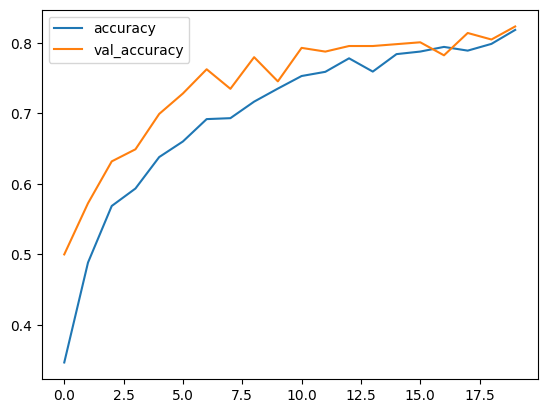

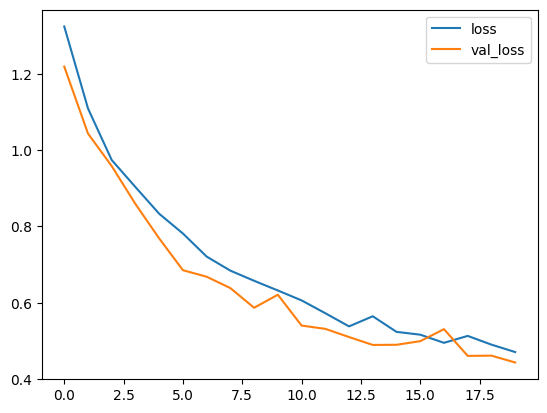

In [ ]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [ ]:
test_path = 'OCT/dataset_split/test'

In [ ]:
#defining a function that will scale images
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images

    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    images = np.array(images)

    images = images/255

    return images

In [ ]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

In [ ]:
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)
y_pred

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
all_lables = ['normal', 'cataract', 'glaucoma', 'diabetic retinopathy']

To find out the file number

In [ ]:
import os

def count_files_until(folder_path, stop_filename):
    count = 0
    found = False

    files = sorted(os.listdir(folder_path))

    for file in files:
        if file == stop_filename:
            found = True
            break
        count += 1

    if found:
        print(f"Found '{stop_filename}' after {count} files.")
    else:
        print(f"'{stop_filename}' not found in {folder_path}.")

    return count

folder = "OCT/dataset_split/test"  # Change this to your folder path
stop_file = "g_711.jpg"  # Change this to the filename you want to stop at

count = count_files_until(folder, stop_file)
print(f"Total files before '{stop_file}': {count}")

✅ Found 'g_711.jpg' after 984 files.
📂 Total files before 'g_711.jpg': 984


View specified image

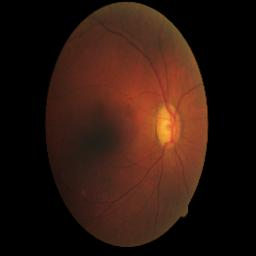

In [ ]:
img = Image.open(test_path + '/g_711.jpg')
img

In [ ]:
print("Predicted label : ",all_lables[y_pred[count]])

Predicted label :  glaucoma


In [ ]:
Save model

In [ ]:
model.save("OCT_model.h5")
model.save("OCT_model.keras")

This block is used to load the model

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("OCT_model.keras")
print("Model loaded successfully!")

✅ Model loaded successfully!


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
from google.colab import files
!zip -r '/content/OCT.zip' '/content/OCT'


Streaming output truncated to the last 5000 lines.
  adding: content/OCT/dataset_split/train/2/g_660.jpg (deflated 7%)
  adding: content/OCT/dataset_split/train/2/g_705.jpg (deflated 4%)
  adding: content/OCT/dataset_split/train/2/g_392.jpg (deflated 3%)
  adding: content/OCT/dataset_split/train/2/g_204.jpg (deflated 3%)
  adding: content/OCT/dataset_split/train/2/g_235.jpg (deflated 4%)
  adding: content/OCT/dataset_split/train/2/g_267.jpg (deflated 3%)
  adding: content/OCT/dataset_split/train/2/g_399.jpg (deflated 5%)
  adding: content/OCT/dataset_split/train/2/g_47.png (deflated 0%)
  adding: content/OCT/dataset_split/train/2/g_893.jpg (deflated 8%)
  adding: content/OCT/dataset_split/train/2/g_87.png (deflated 0%)
  adding: content/OCT/dataset_split/train/2/g_13.jpg (deflated 1%)
  adding: content/OCT/dataset_split/train/2/g_52.jpg (deflated 1%)
  adding: content/OCT/dataset_split/train/2/g_575.jpg (deflated 9%)
  adding: content/OCT/dataset_split/train/2/g_582.jpg (deflated 5%)
 

In [ ]:
files.download('/content/OCT_model.h5')
files.download('/content/OCT_model.keras')